# Introduction

In this Part, we will follow the steps the authors took for their analysis. More specifically:
1. Import libraries for preprocessing data
2. Preprocess data using signal processing techniques
3. Visualize and compare the preprocessed data with original
4. Export the preprocessed data for deep learning

### Step 1: Import libraries
We will be using signal processing library PyWavelets (<a href="https://pywavelets.readthedocs.io/en/latest/index.html">documentation</a>) on top of the usual libraries. Make sure you pip install it if you don't have them.
- pywt
- pandas as pd
- numpy as np
- matplotlib.pyplot as plt
- mean_squared_error from sklearn.metrics

In [1]:
# Step 1: Import libraries
import pywt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("spx.csv", index_col="Date")
df.index = pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [3]:
# Step 2: Read the CSV as a DataFrame
df = pd.read_csv("spx.csv", index_col = 0)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2019-06-25,2945.780029,2946.520020,2916.010010,2917.379883,2917.379883,3578050000
2019-06-26,2926.070068,2932.590088,2912.989990,2913.780029,2913.780029,3478130000
2019-06-27,2919.659912,2929.300049,2918.570068,2924.919922,2924.919922,3122920000


## Data preparation
In this part, we will prepare our data according to the publication.

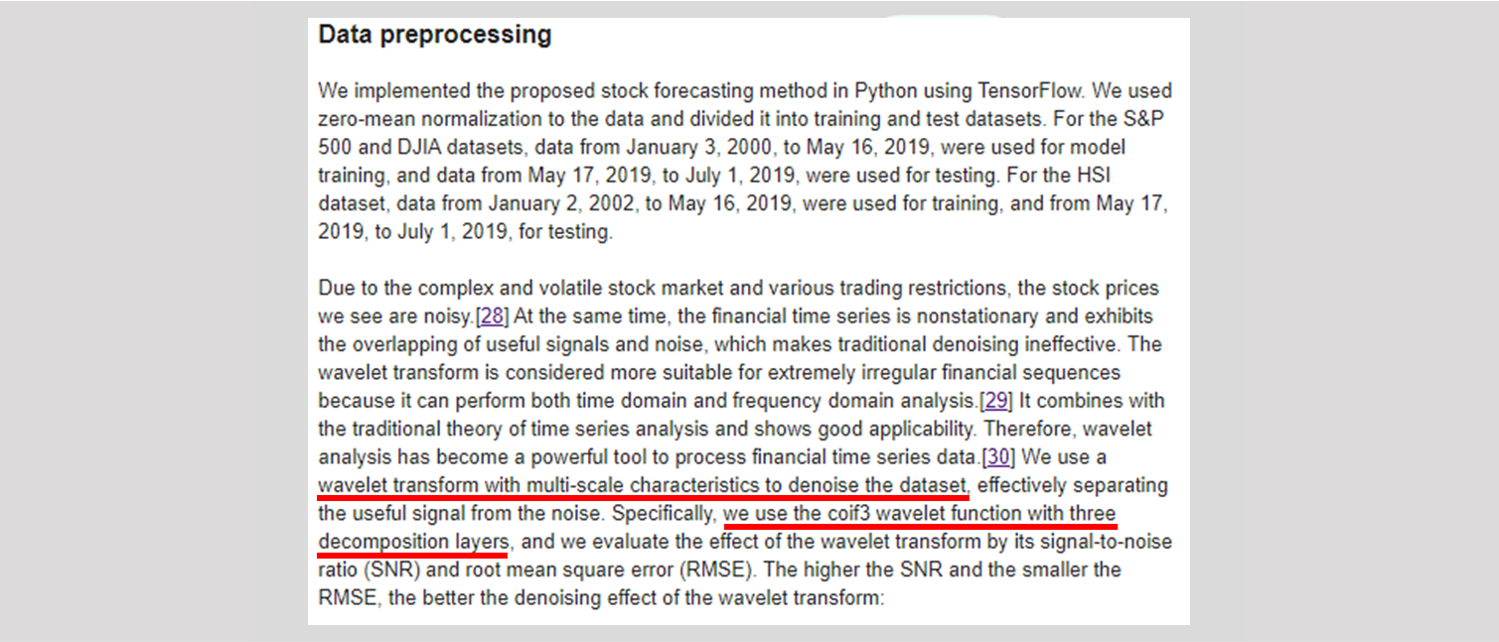

### Define a low-pass filter
We implement a low-pass filter for 'Open' dataset. 

References:
- <a href='https://pywavelets.readthedocs.io/en/latest/regression/multilevel.html'>PyWavelets documentation for multilevel deconstruction and reconstruction</a>
- <a href="https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/">Guide</a> 

In [4]:
# Define a low-pass filter
def lowpassfilter(signal, thresh = 0.63, wavelet="db4"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[3:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[3:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

In [5]:
# Generate the filtered version of 'Open'
filtered_open = lowpassfilter(df["Open"],0.01,"coif3")

In [6]:
# Add the FilteredOpen column
df["FilteredOpen"] = filtered_open
df

,Open,High,Low,Close,Adj Close,Volume,FilteredOpen
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,1509.891113
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,1460.423078
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,1438.658516
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,1386.279016
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1399.262688
...,...,...,...,...,...,...,...
2019-06-25,2945.780029,2946.520020,2916.010010,2917.379883,2917.379883,3578050000,2911.075968
2019-06-26,2926.070068,2932.590088,2912.989990,2913.780029,2913.780029,3478130000,2913.774021
2019-06-27,2919.659912,2929.300049,2918.570068,2924.919922,2924.919922,3122920000,2913.647693


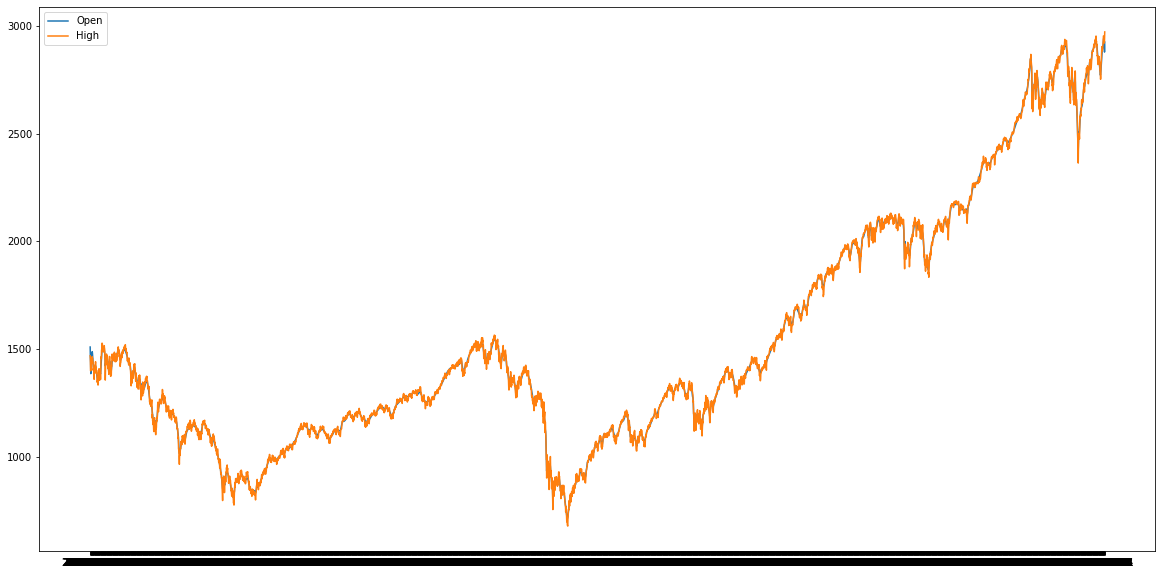

In [7]:
# Plot FilteredOpen
plt.figure(figsize=(20,10))
plt.plot(df.FilteredOpen)
plt.plot(df.Open)
plt.legend(df)

In [8]:
# Calculate the RMSE
print(mean_squared_error(df["Open"],df["FilteredOpen"]) ** 0.5)

13.978930906982004


### End of Part III

In the next Part, we will train an LSTM model to predict stock pricing for S&P 500. 